In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys

# TODO: change this to the path to your homework folder
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'EECS-487-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
sys.path.append(GOOGLE_DRIVE_PATH)

['reuters_headlines.pickle', 'wiki_sentences.pickle', 'abcnews-date-text.csv', 'README.md', 'naive_bayes.py', 'Short-Text-Corpus-For-Humor-Detection-master.zip', '.DS_Store', 'wiki.csv', 'reuters.csv', 'Short-Text-Corpus-For-Humor-Detection-master', '__pycache__', '.idea', '.git', 'run_main.ipynb', '.ipynb_checkpoints', 'vectors.kv.vectors.npy', 'vectors.kv', 'data_processor.py', 'pickle_to_csv.py', 'dev.csv', 'gold-test-27446.csv', 'train.csv', 'main.py', 'model.py', 'train.py', 'Copy of run_main.ipynb']


In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
# install required packages
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
%load_ext autoreload
%autoreload 2

import os
import json

import numpy as np
import gensim.downloader
from torch.utils.data import DataLoader

In [6]:
import itertools
from tqdm.notebook import tqdm
from train import get_optimizer, train_model, plot_loss, get_performance, get_hyper_parameters, get_loss_fn
from model import Model
from naive_bayes import NaiveBayes, evaluate
from data_processor import basic_collate_fn, HumorDataset, load_data, load_data_nb
import os
import torch
from torch.utils.data import DataLoader


x_train, y_train = load_data("/content/drive/My Drive/EECS-487-Project/train.csv")
x_dev, y_dev = load_data("/content/drive/My Drive/EECS-487-Project/dev.csv")
x_test, y_test = load_data("/content/drive/My Drive/EECS-487-Project/gold-test-27446.csv")
train_data = HumorDataset(x_train, y_train)
dev_data = HumorDataset(x_dev, y_dev)
test_data = HumorDataset(x_test, y_test)

train_loader = DataLoader(train_data, batch_size=16, collate_fn=basic_collate_fn, shuffle=True)
dev_loader = DataLoader(dev_data, batch_size=16, collate_fn=basic_collate_fn, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, collate_fn=basic_collate_fn, shuffle=True)


In [7]:
from main import overfit
overfit(train_data)

------------------------ Start Training ------------------------


RuntimeError: ignored

In [8]:
net = Model(256).to(device)
optim = get_optimizer(net, lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.LinearLR(optim, start_factor=1.0,
                                              end_factor=0, total_iters=40)
model, stats = train_model(net, train_loader, dev_loader, optim, scheduler,
                            num_epoch=40, patience=10, collect_cycle=500,
                            device=device, verbose=True)

------------------------ Start Training ------------------------
Epoch No. 1--Iteration No. 750-- batch loss = 0.3117
Validation accuracy: 0.7807
Validation loss: 0.3269
Epoch No. 2--Iteration No. 1500-- batch loss = 0.3152
Validation accuracy: 0.8493
Validation loss: 0.2351
Epoch No. 3--Iteration No. 2250-- batch loss = 0.1195
Validation accuracy: 0.8387
Validation loss: 0.2488
Epoch No. 4--Iteration No. 3000-- batch loss = 0.1208
Validation accuracy: 0.8507
Validation loss: 0.2300
Epoch No. 5--Iteration No. 3750-- batch loss = 0.0584
Validation accuracy: 0.8613
Validation loss: 0.2267
Epoch No. 6--Iteration No. 4500-- batch loss = 0.1109
Validation accuracy: 0.8687
Validation loss: 0.2100
Epoch No. 7--Iteration No. 5250-- batch loss = 0.1131
Validation accuracy: 0.8620
Validation loss: 0.2367
Epoch No. 8--Iteration No. 6000-- batch loss = 0.3768
Validation accuracy: 0.8733
Validation loss: 0.2169
Epoch No. 9--Iteration No. 6750-- batch loss = 0.1437
Validation accuracy: 0.8587
Valida

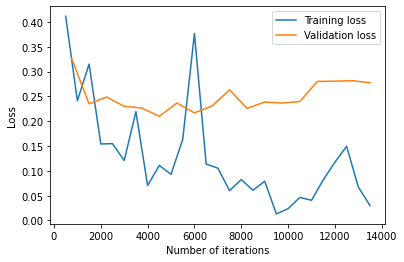

In [9]:
plot_loss(stats)

In [10]:
loss_fn = get_loss_fn()
accuracy, loss = get_performance(model, loss_fn, test_loader, device)
print("test acc and loss: ", accuracy, loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:695: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  ../aten/src/ATen/native/cudnn/RNN.cpp:925.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


test acc and loss:  tensor(0.8607) 0.23063016476783346


In [12]:
from train import evaluate
loss_fn = get_loss_fn()
accuracy, loss, mac_f1, mic_f1 = evaluate(model, loss_fn, test_loader, device)
print("test acc, loss, mac_f1, mic_f1: ", accuracy, loss, mac_f1, mic_f1)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:695: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  ../aten/src/ATen/native/cudnn/RNN.cpp:925.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


test acc, loss, mac_f1, mic_f1:  0.8606666922569275 0.22994829833190492 0.8567554600259794 0.8606666666666667
